# Generating Sets of Responsive Images

Here we have three responsive-image information designs:

- Gallery Image Strategy
- Hero Image (and Portrait Hero Image) Strategy
- Index Background Strategy

In [1]:
from IPython import display
from IPython.core.interactiveshell import InteractiveShell
from wand.color import Color
from wand.drawing import Drawing
from wand.image import Image

InteractiveShell.ast_node_interactivity = 'all'

background_color_code = '#ff8c00' # DarkOrange https://en.wikipedia.org/wiki/Web_colors
text_color_code = '#fff'
font_location = './fonts/ickyticket-mono-font/IckyticketMono-nKpJ.ttf'

def render_and_save_original(w, h, output_filename):
    with Color(background_color_code) as background_color:
        with Image(width=w, height=h, background=background_color) as img:
            img.save(filename=output_filename)

w, h = 1080, 1920
output_filename = f'original_portrait_{w}x{h}.png'

render_and_save_original(w, h, output_filename)

w, h = 1920, 1080
output_filename = f'original_1080p_{w}x{h}.png'

render_and_save_original(w, h, output_filename)

## Gallery Image Strategy

The design goal of the ‘gallery’ image is the desire to display an image at a _maximum_ resolution, full-screen, landscape orientation. This desire could be satisfied in a full-screen hero image layout or the typical gallery presentation.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following:

| name | size | operation
|- |- |-
| `gallery-720p` | `1280x720` | resize
| `gallery-sd` | `640x480` | crop 720p
| `gallery-thumb` | `120x120` | crop SD

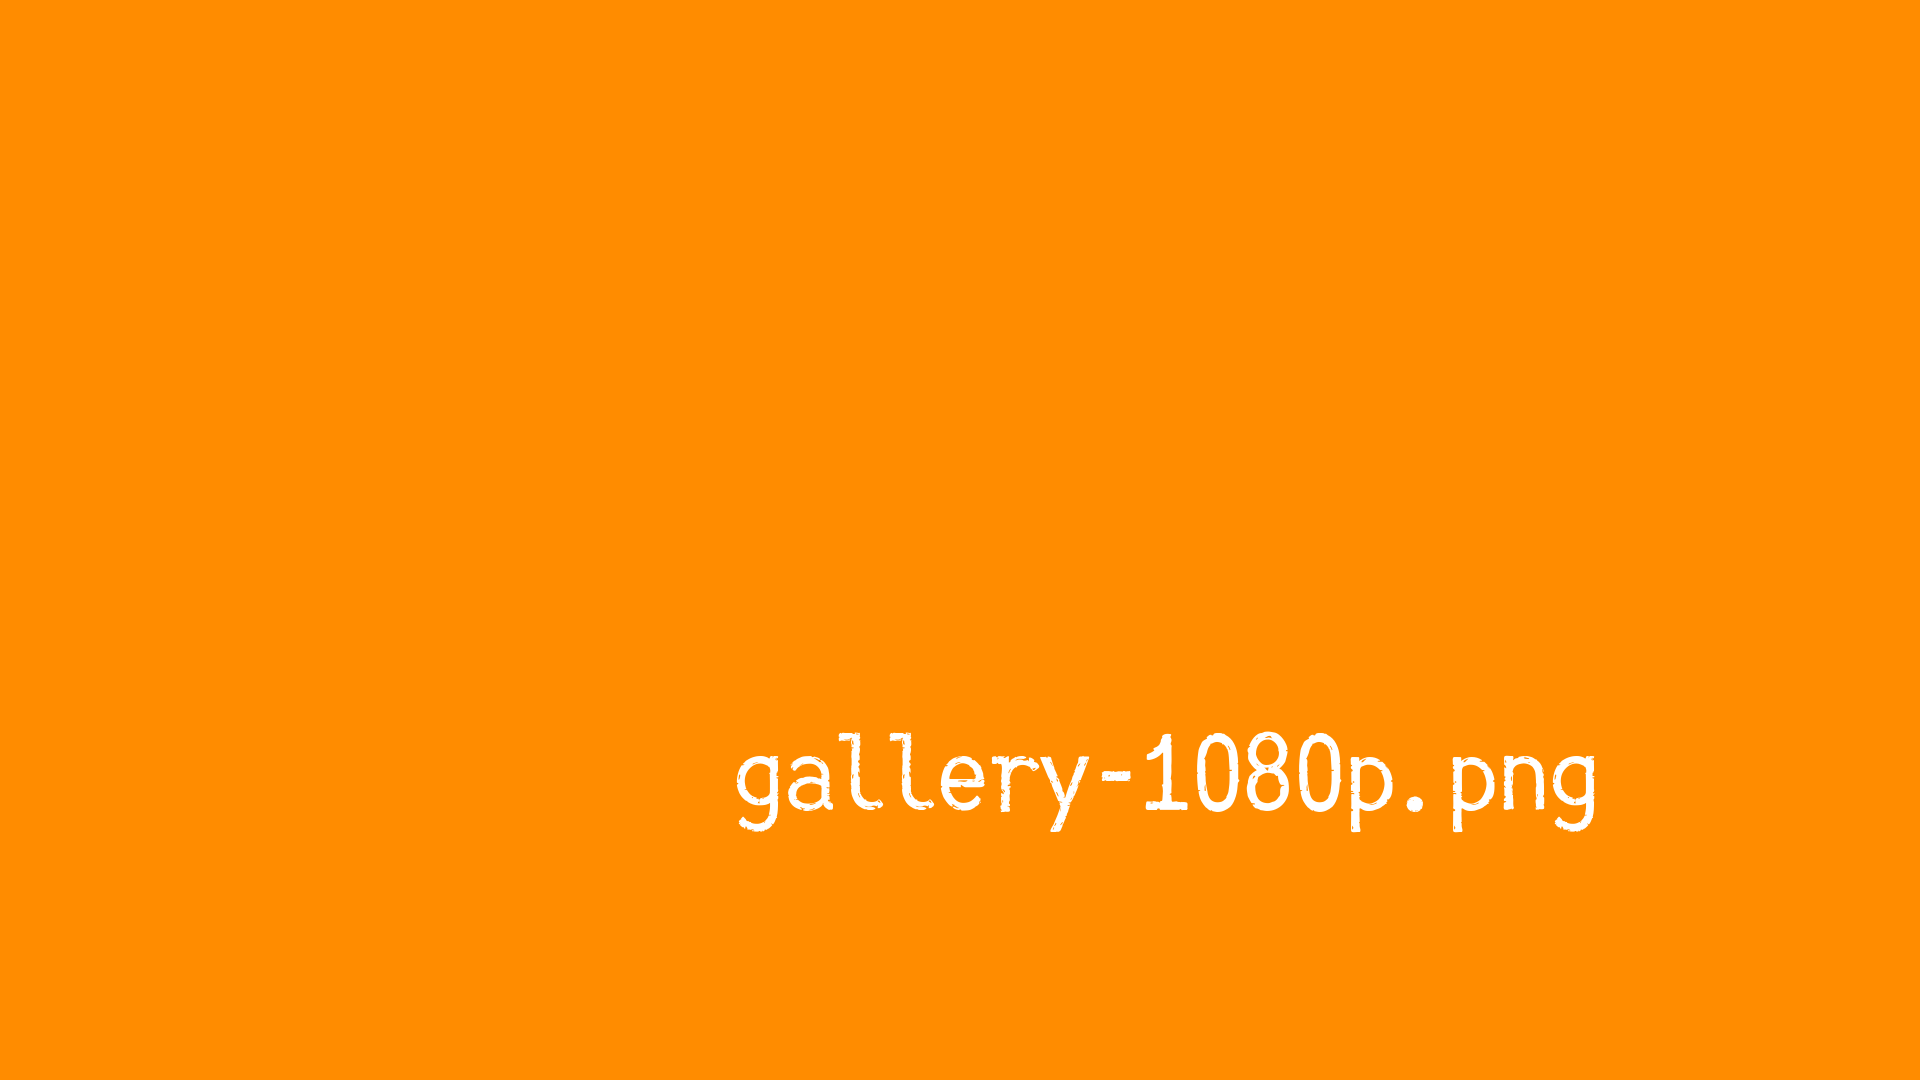

In [2]:
output_filename = 'gallery-1080p.png'
output_path = f'./gallery/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 108

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/6), h - int(h/4)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

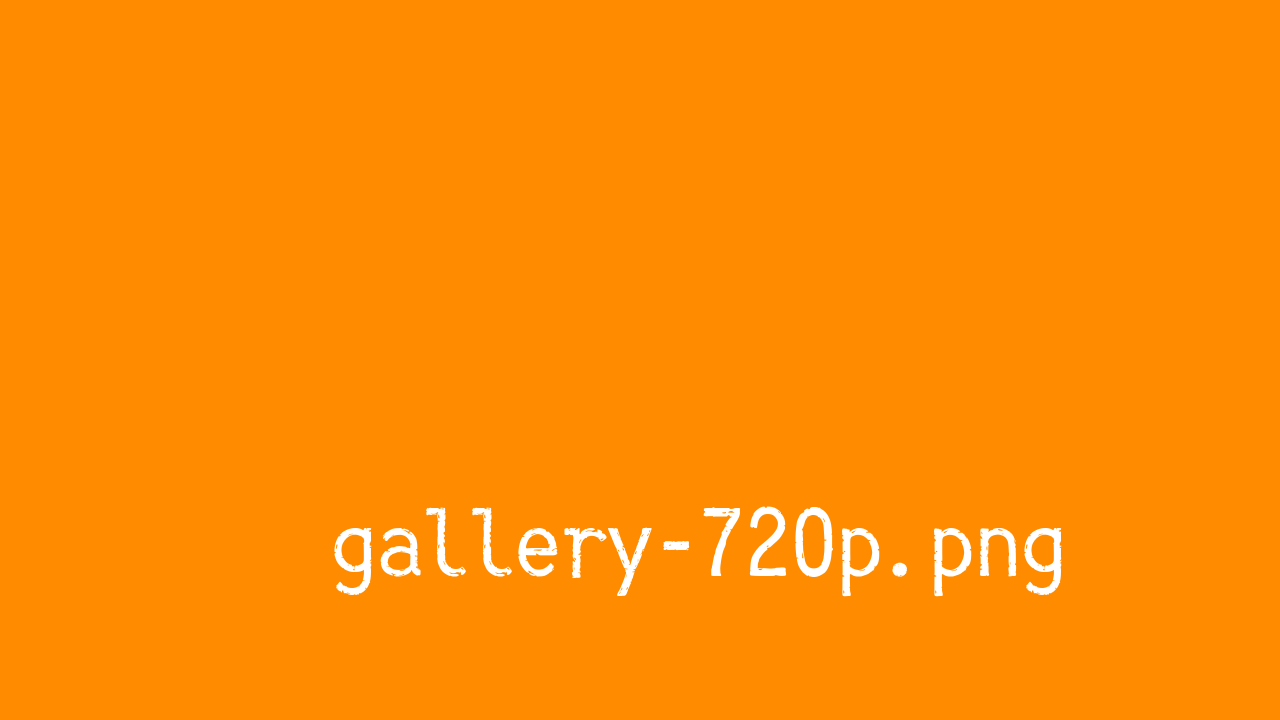

In [3]:
w, h = 1280, 720
output_filename = 'gallery-720p.png'
output_path = f'./gallery/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/6), h - int(h/5)

                clone.resize(w, h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

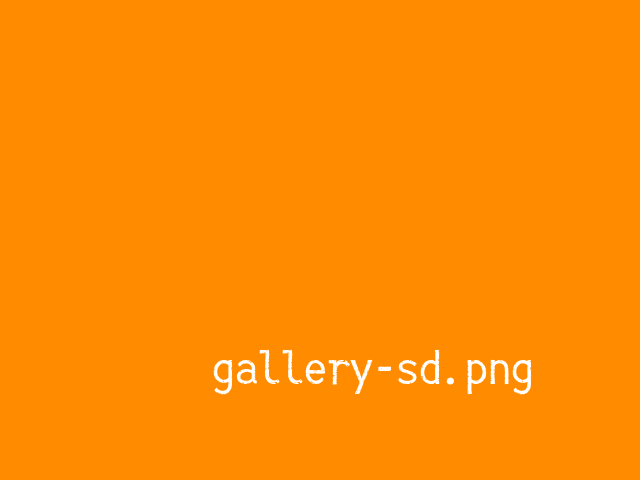

In [4]:
w, h = 640, 480
output_filename = 'gallery-sd.png'
output_path = f'./gallery/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 48

        with Image(filename='./gallery/gallery-720p.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/6), h - int(h/5)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)

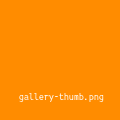

In [5]:
w, h = 120, 120
output_filename = 'gallery-thumb.png'
output_path = f'./gallery/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 10

        with Image(filename='./gallery/gallery-sd.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - 16, h - int(h/6)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)

## Hero Image Strategy

One approach to a design based on the “hero” image is to start with a Full HD landscape and crop down, using rule-of-thirds vertical dimensions.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following with vertical, rule-of-thirds dimensions:

| name | size | operation(s)
|- |- |-
`hero-1080p` | `1920x640` | crop
`hero-720p` | `1280x240` | resize, crop

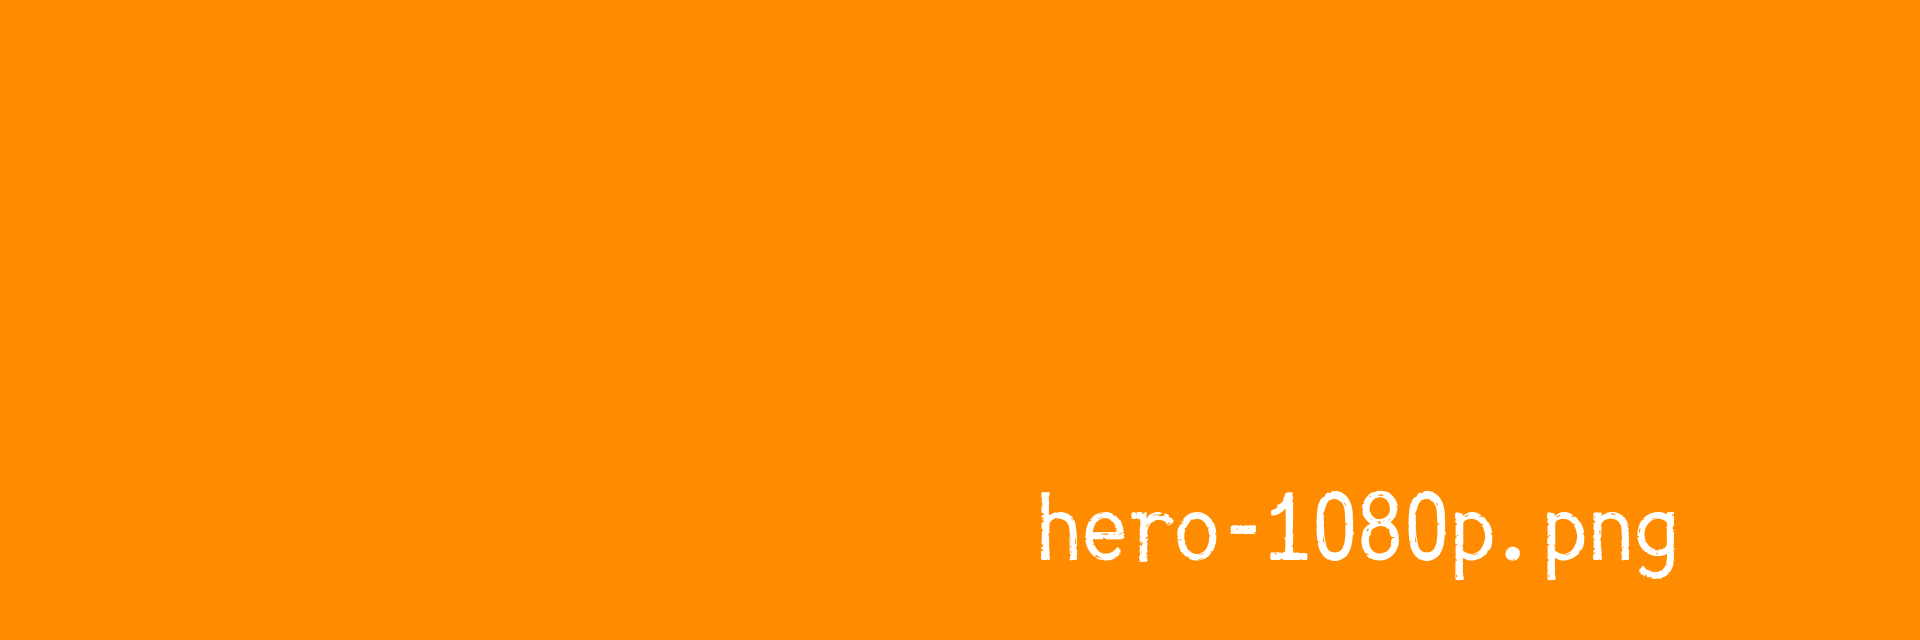

In [6]:
w, h = 1920, 640
output_filename = 'hero-1080p.png'
output_path = f'./hero/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h - int(h/8)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

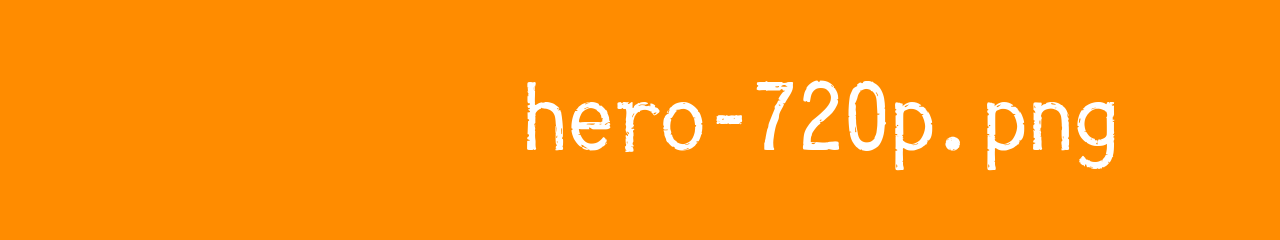

In [7]:
w, h, h_crop = 1280, 720, 240
output_filename = 'hero-720p.png'
output_path = f'./hero/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h_crop - int(h/8)

                clone.resize(width=w, height=h)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h_crop)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

## Portrait Hero Image Strategy

Another approach to the “hero” image is the intent to lay it out with text, suggesting that this image will be in a portrait orientation, flowing with, say, text. This would be the typical 20<sup>th</sup> magazine layout of the print era.

We start with a Full HD (1080p) image: `1920x1080`

From the starting image we generate the following with horizontal, rule-of-thirds dimensions:

| name | size | operation(s)
|- |- |-
`hero-portrait-1080p` | `640x1080` | crop
`hero-portrait-720p` | `427x720` | resize, crop

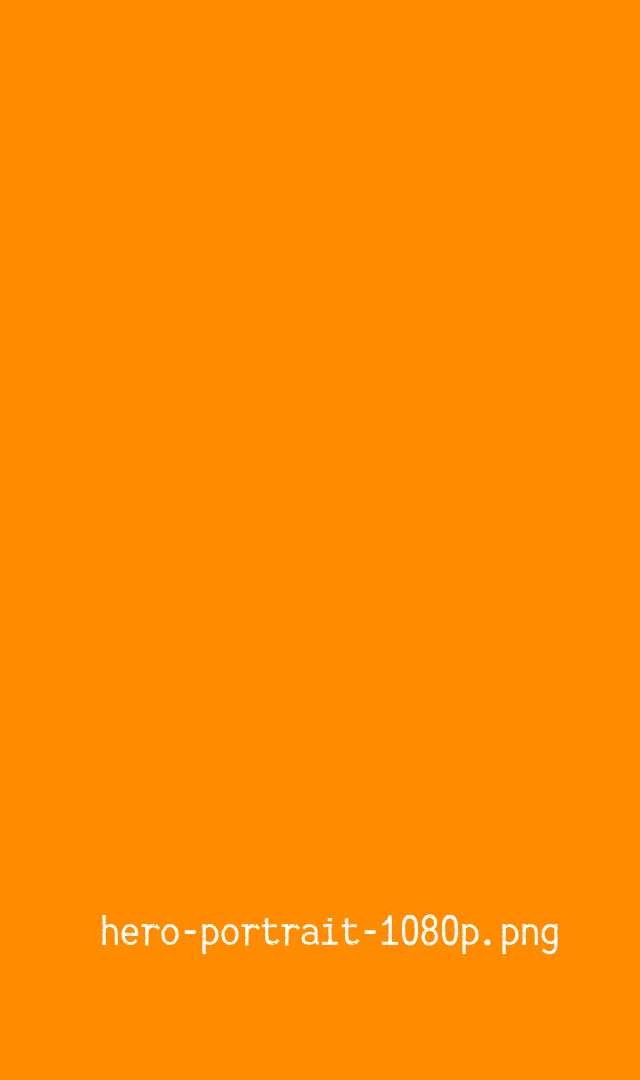

In [8]:
w, h = 640, 1080
output_filename = 'hero-portrait-1080p.png'
output_path = f'./hero/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 42

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h - int(h/8)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)

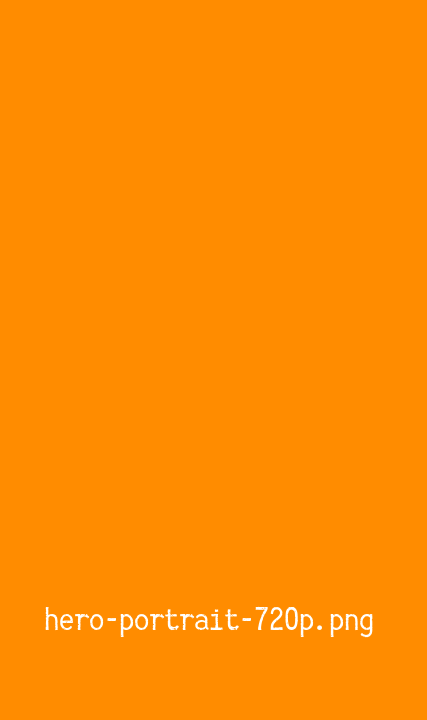

In [9]:
w, h, h_crop = 427, 721, 720
output_filename = 'hero-portrait-720p.png'
output_path = f'./hero/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 32

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/8), h_crop - int(h/8)

                clone.resize(width=w, height=h)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h_crop)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)

## Index Background Strategy

The Index Background Strategy is very similar to the Gallery Image Strategy except that  portrait orientation must be taken into account. We can do this by starting with two different originals. One is portrait (`1080x1920`), the other landscape (HD):

| original | name | size | operation
|- |- |- |-
| `1920x1080` | `index-720p` | `1280x720` | resize
| `1920x1080` | `index-sd` | `640x480` | crop 720p
| `1080x1920` | `index-720x1280` | `720x1280` | resize
| `1080x1920` | `index-480x640` | `480x640` | crop 720x1280


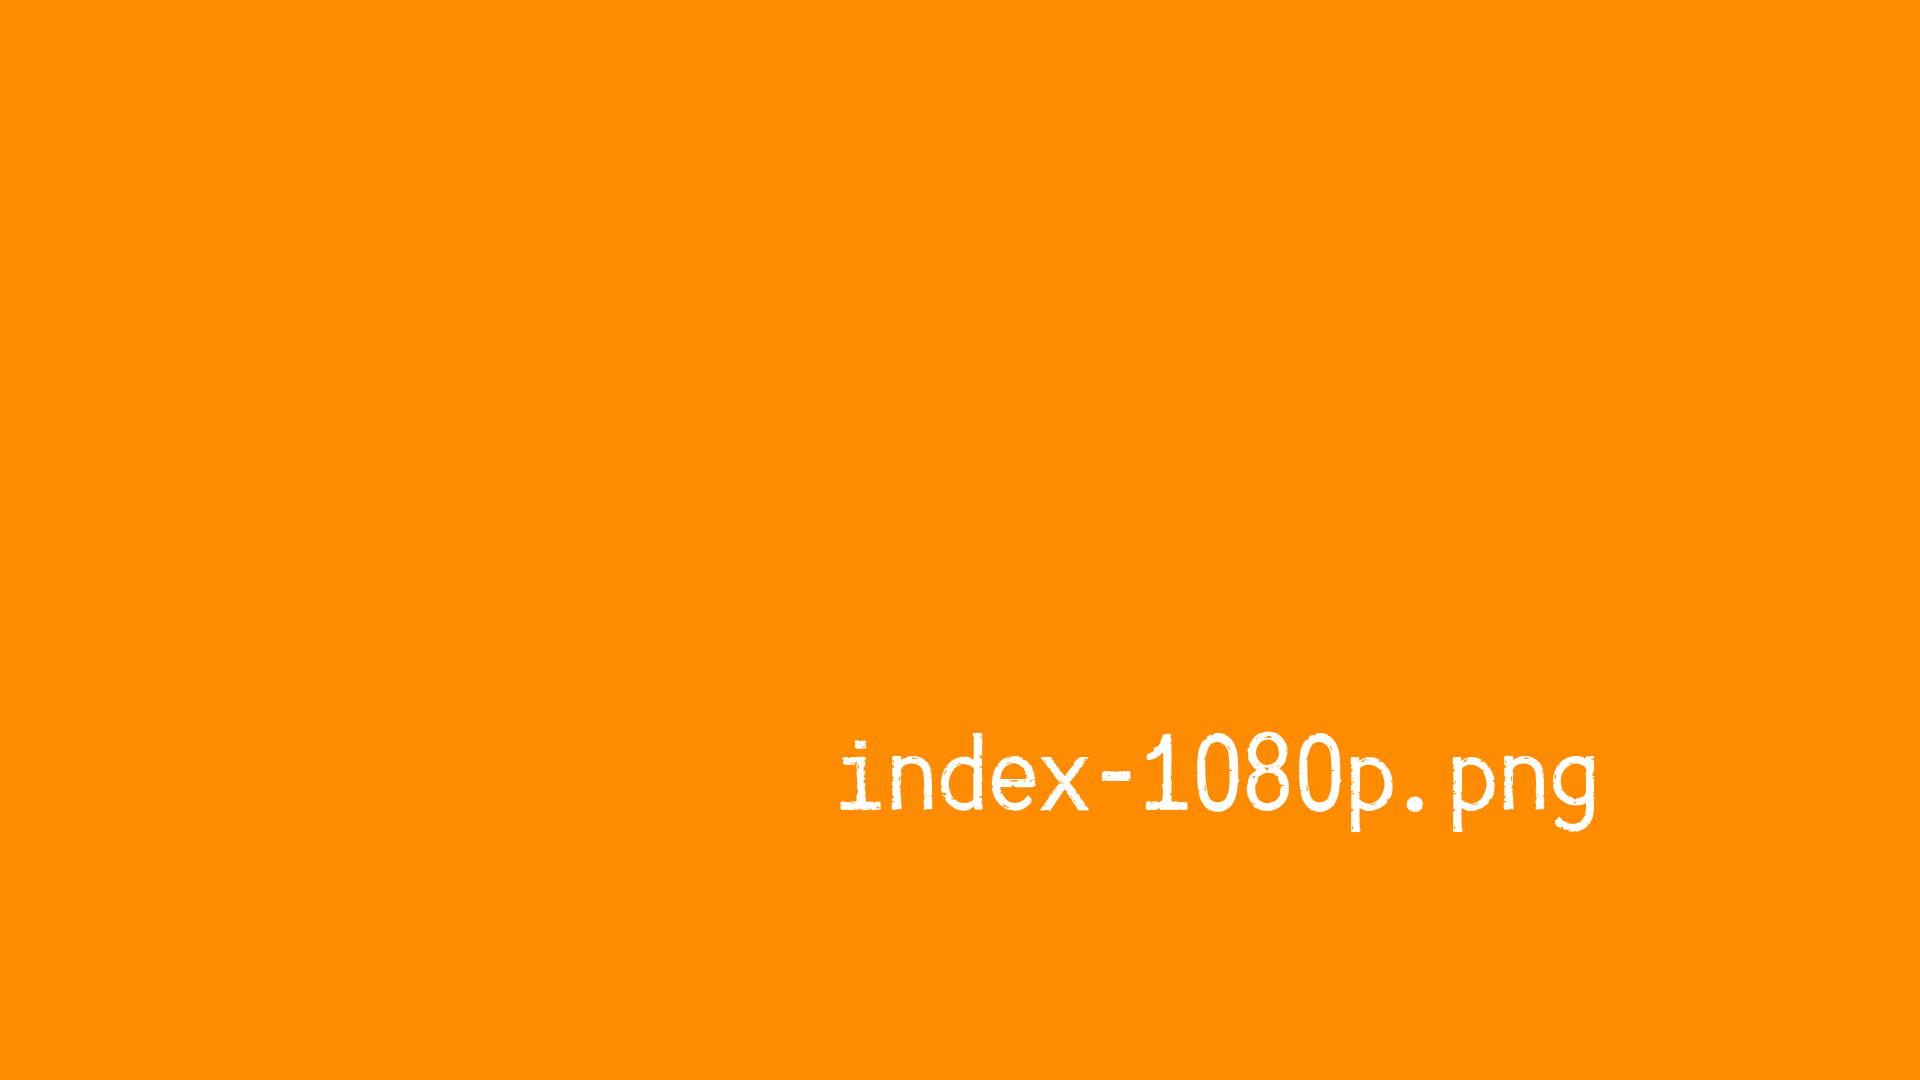

In [10]:
w, h = 1920, 1080
output_filename = 'index-1080p.png'
output_path = f'./index/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 108

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/6), h - int(h/4)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

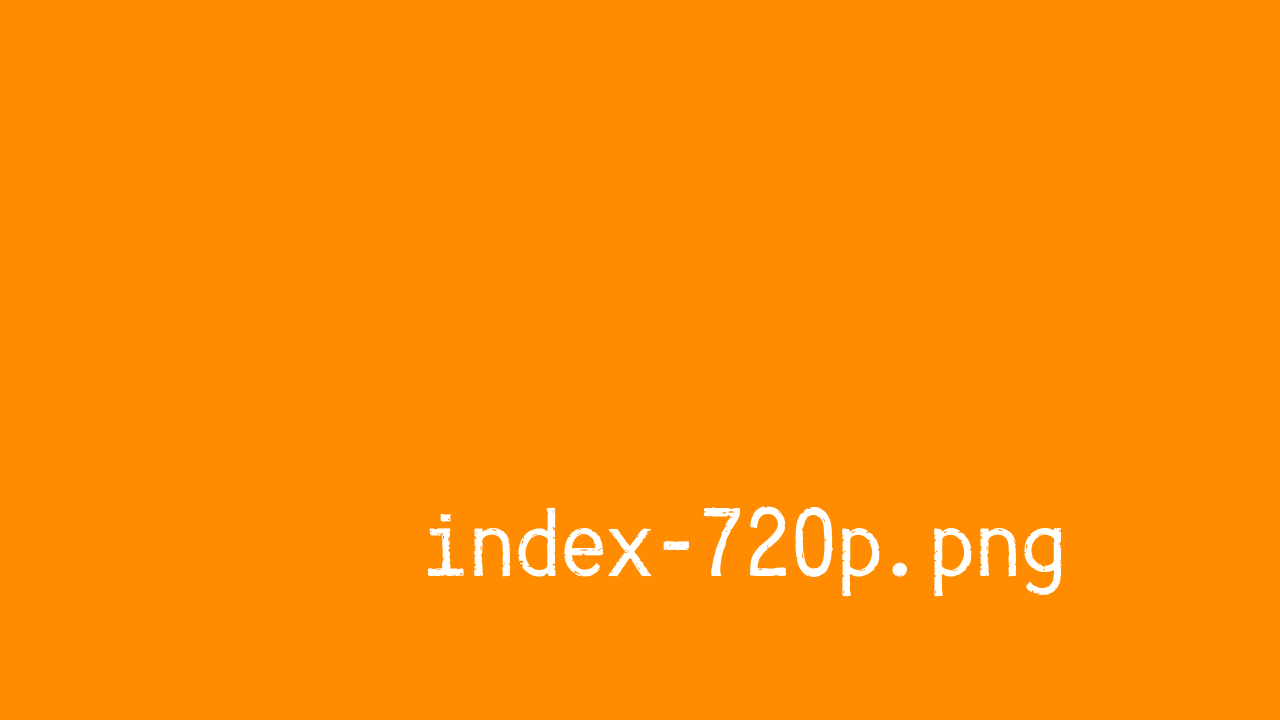

In [11]:
w, h = 1280, 720
output_filename = 'index-720p.png'
output_path = f'./index/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./original_1080p_1920x1080.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/6), h - int(h/5)

                clone.resize(w, h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

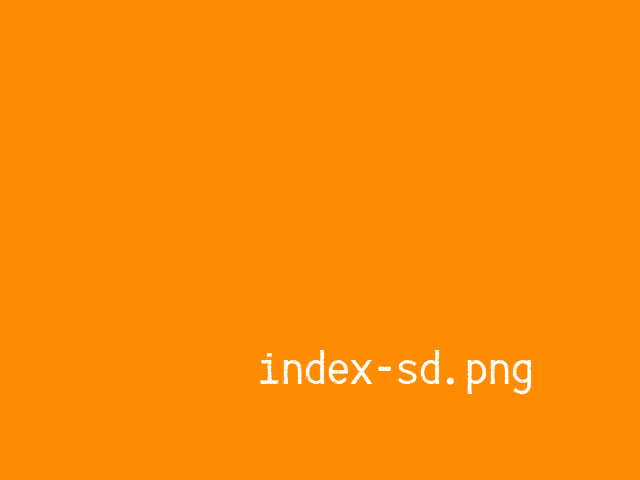

In [12]:
w, h = 640, 480
output_filename = 'index-sd.png'
output_path = f'./index/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 48

        with Image(filename='./index/index-720p.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - int(w/6), h - int(h/5)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)

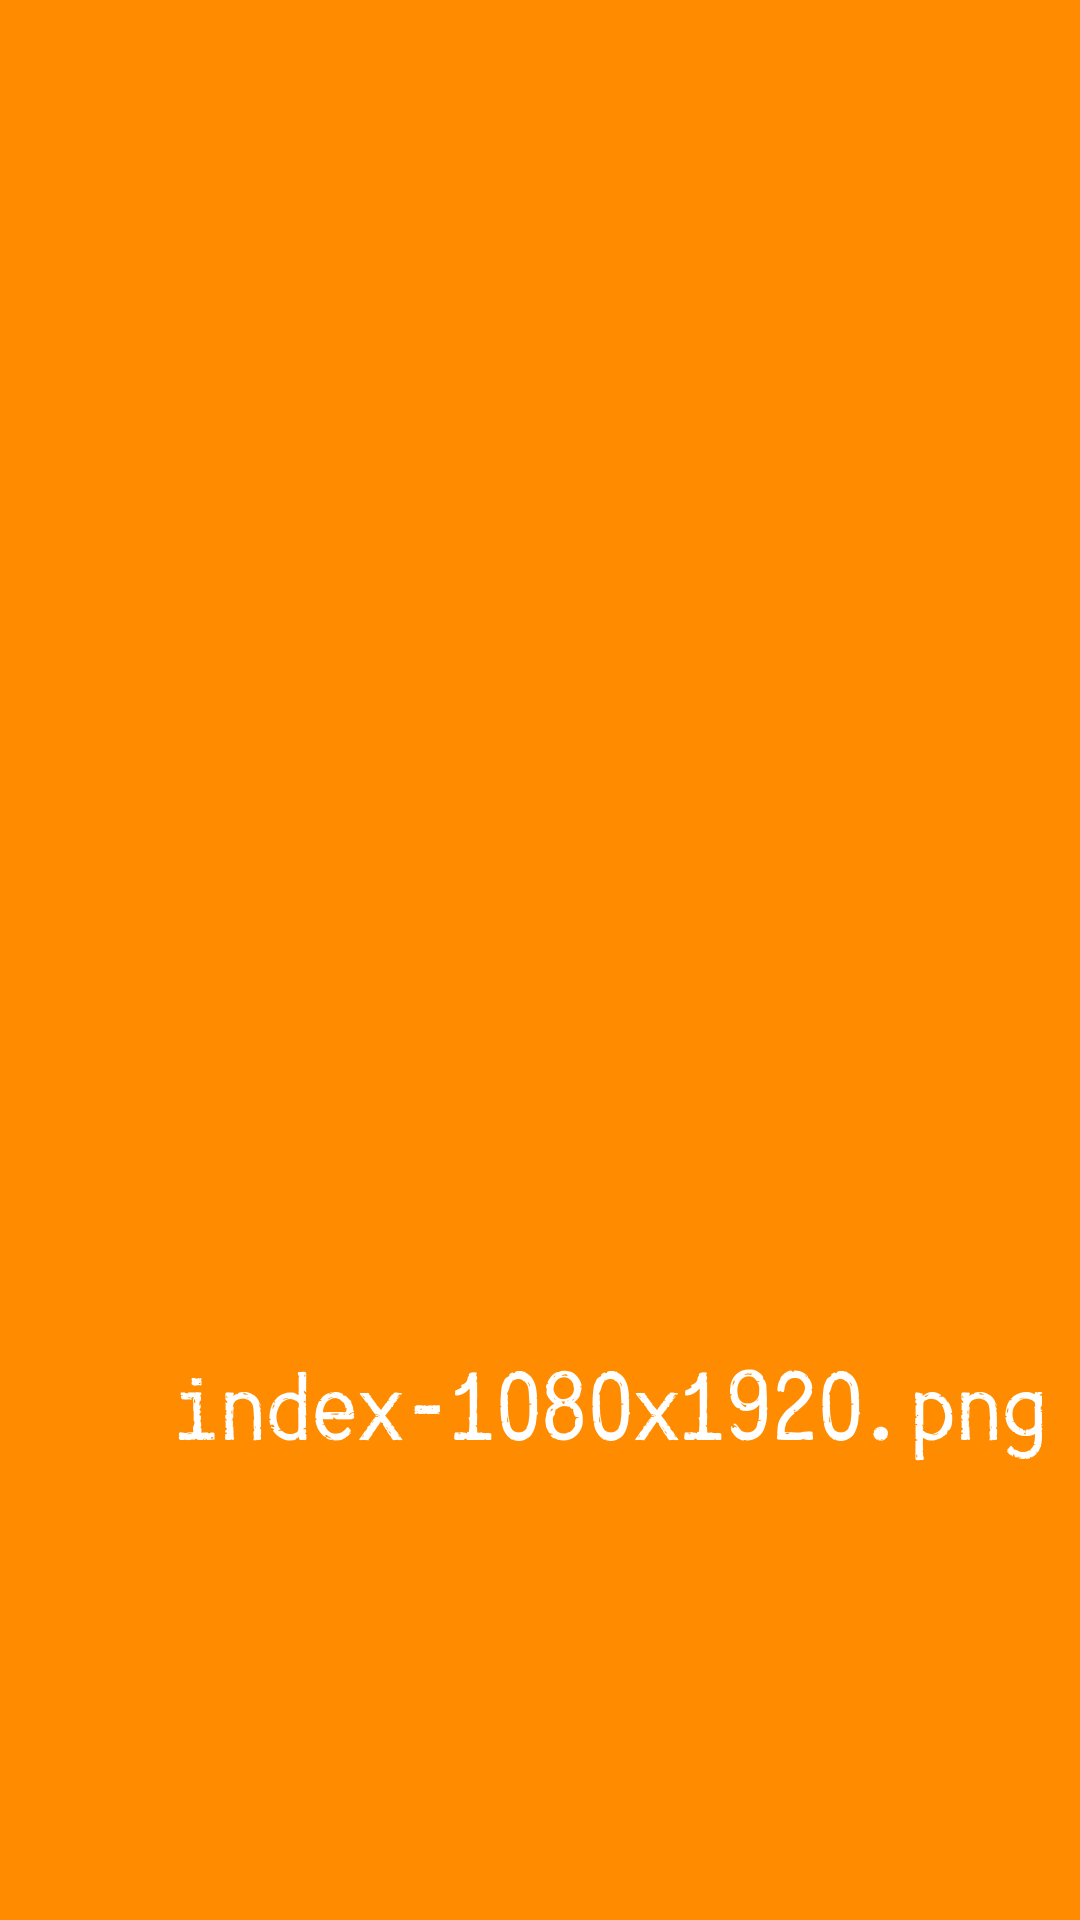

In [13]:
w, h = 1080, 1920
output_filename = f'index-{w}x{h}.png'
output_path = f'./index/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 96

        with Image(filename='./original_portrait_1080x1920.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - 32, h - int(h/4)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path, width=800)

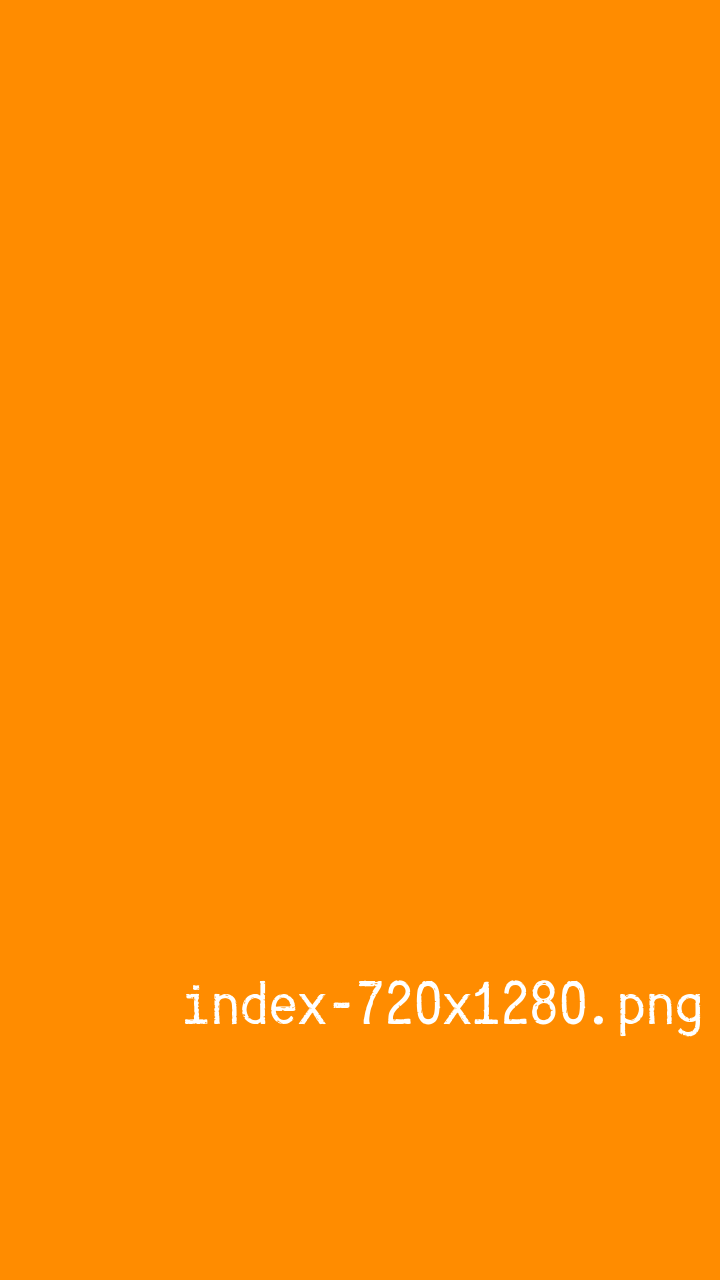

In [14]:
w, h = 720, 1280
output_filename = f'index-{w}x{h}.png'
output_path = f'./index/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 60

        with Image(filename='./original_portrait_1080x1920.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - 16, h - int(h/5)

                clone.resize(w, h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)

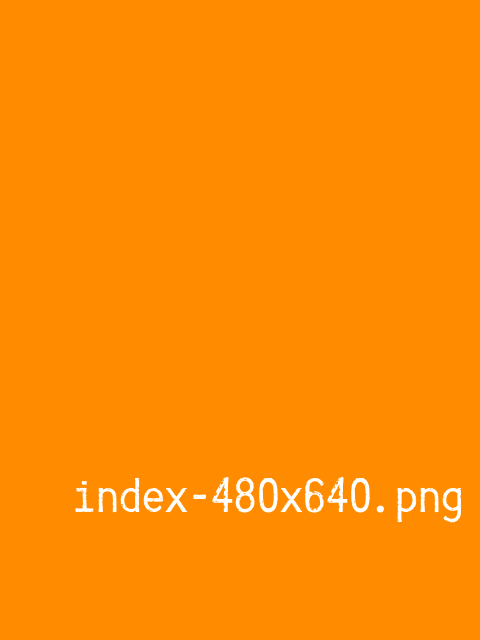

In [15]:
w, h = 480, 640
output_filename = f'index-{w}x{h}.png'
output_path = f'./index/{output_filename}'

with Color(text_color_code) as text_color:
    with Drawing() as draw:
        draw.fill_color = text_color
        draw.font = font_location
        draw.font_size = 48

        with Image(filename='./index/index-720x1280.png') as original:
            with original.clone() as clone:
                font_metrics = draw.get_font_metrics(image=clone, text=output_filename) 
                text_width = int(font_metrics.text_width)
                x, y = w - text_width - 16, h - int(h/5)

                _ = clone.crop(
                    left=0,
                    top=0,
                    right=w,
                    bottom=h)

                draw.text(x, y, output_filename)
                draw(clone)
                clone.save(filename=output_path)

display.Image(filename=output_path)